In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


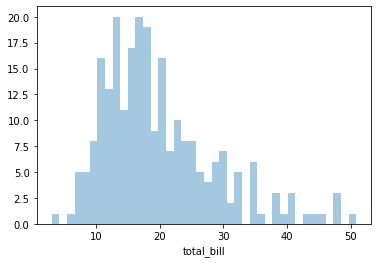

In [39]:
sns.distplot(tips['total_bill'],kde=False,bins=40)

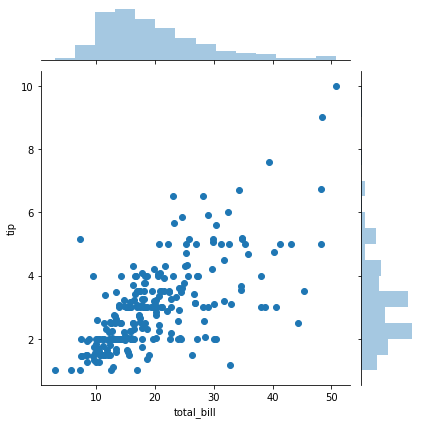

In [31]:
sns.jointplot(x='total_bill',y='tip',data=tips)

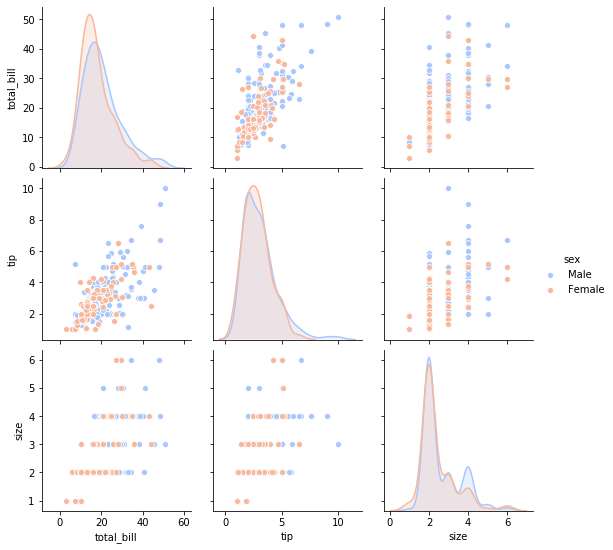

In [29]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

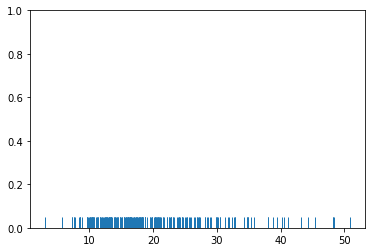

In [32]:
sns.rugplot(tips['total_bill'])

(0, 1)

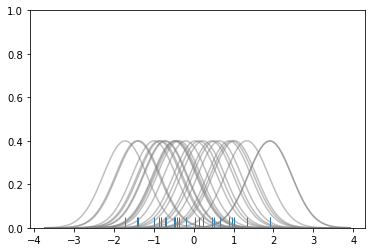

In [35]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

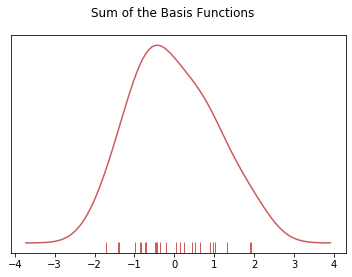

In [36]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

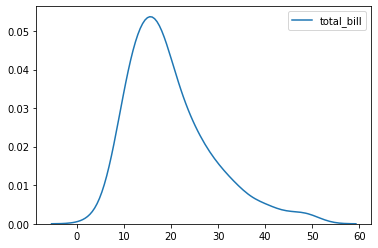

In [37]:
sns.kdeplot(tips['total_bill'])

In [47]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


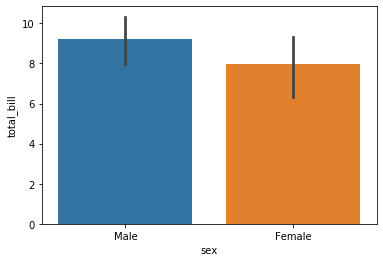

In [92]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

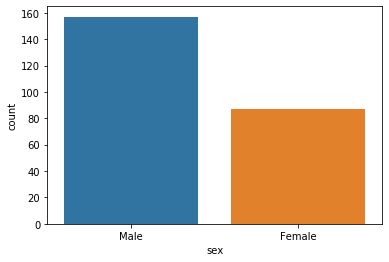

In [60]:
sns.countplot(x='sex',data=tips)

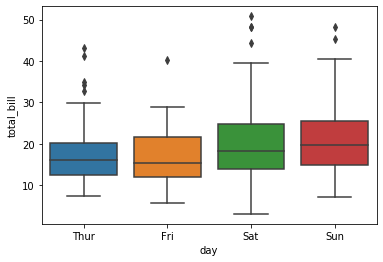

In [65]:
sns.boxplot(x='day',y='total_bill',data=tips)

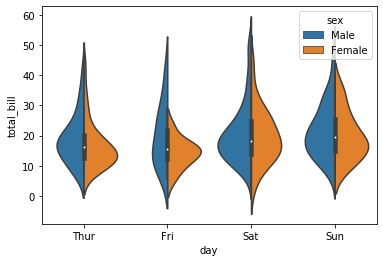

In [68]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

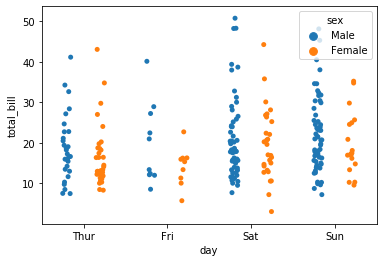

In [75]:
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex',dodge=True)

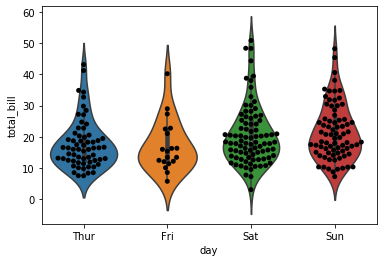

In [84]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black') #do not use for very large data sets

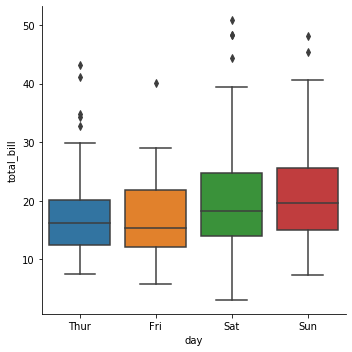

In [97]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='box')

In [98]:
#Matrix Plots

In [101]:
import seaborn as sns
%matplotlib inline
tips= sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [131]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [104]:
tc = tips.corr()

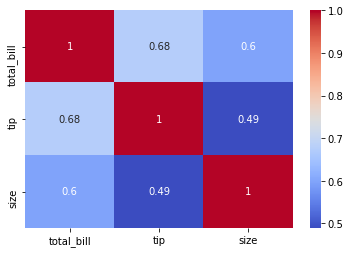

In [110]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [106]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [114]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

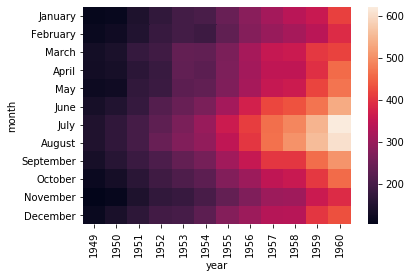

In [123]:
sns.heatmap(fp)

In [124]:
#Cluster Map

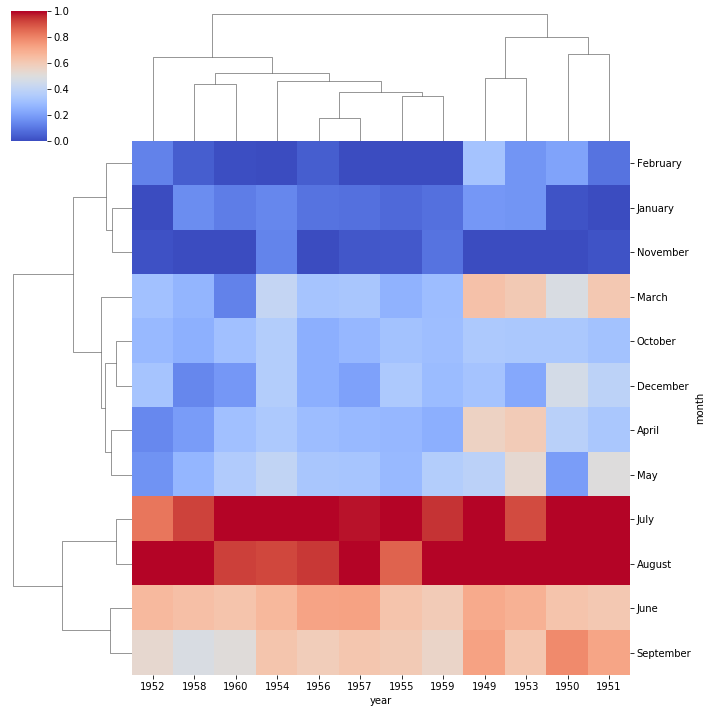

In [134]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [135]:
#Grids

In [136]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


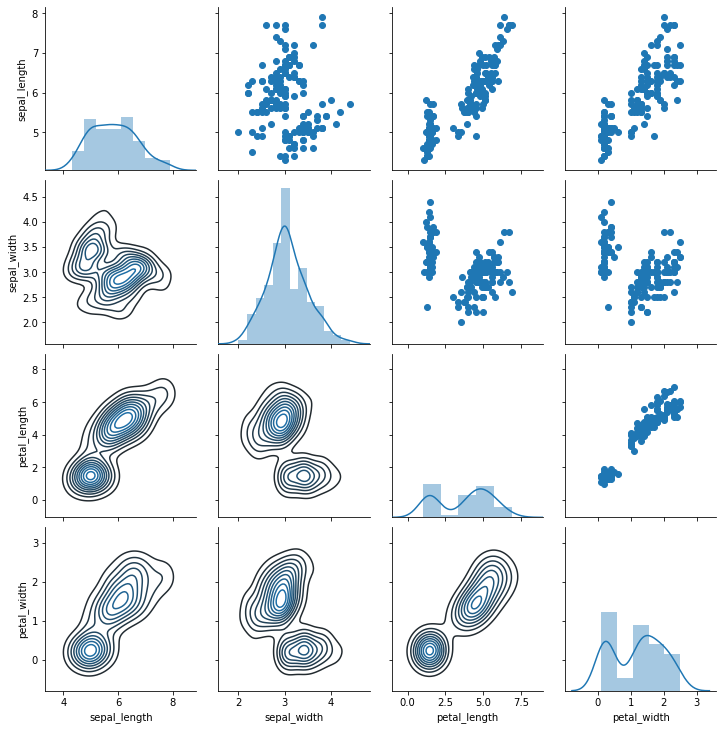

In [146]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

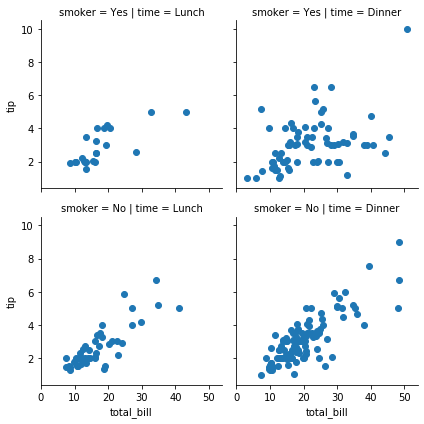

In [156]:
g = sns.FacetGrid(tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

In [158]:
#Regression Plots

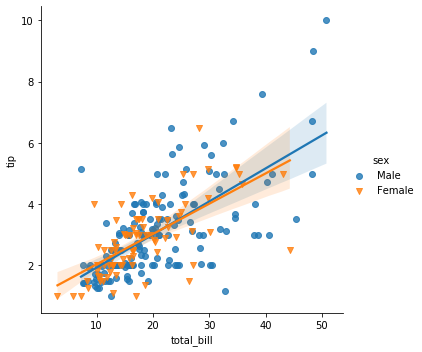

In [181]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'])

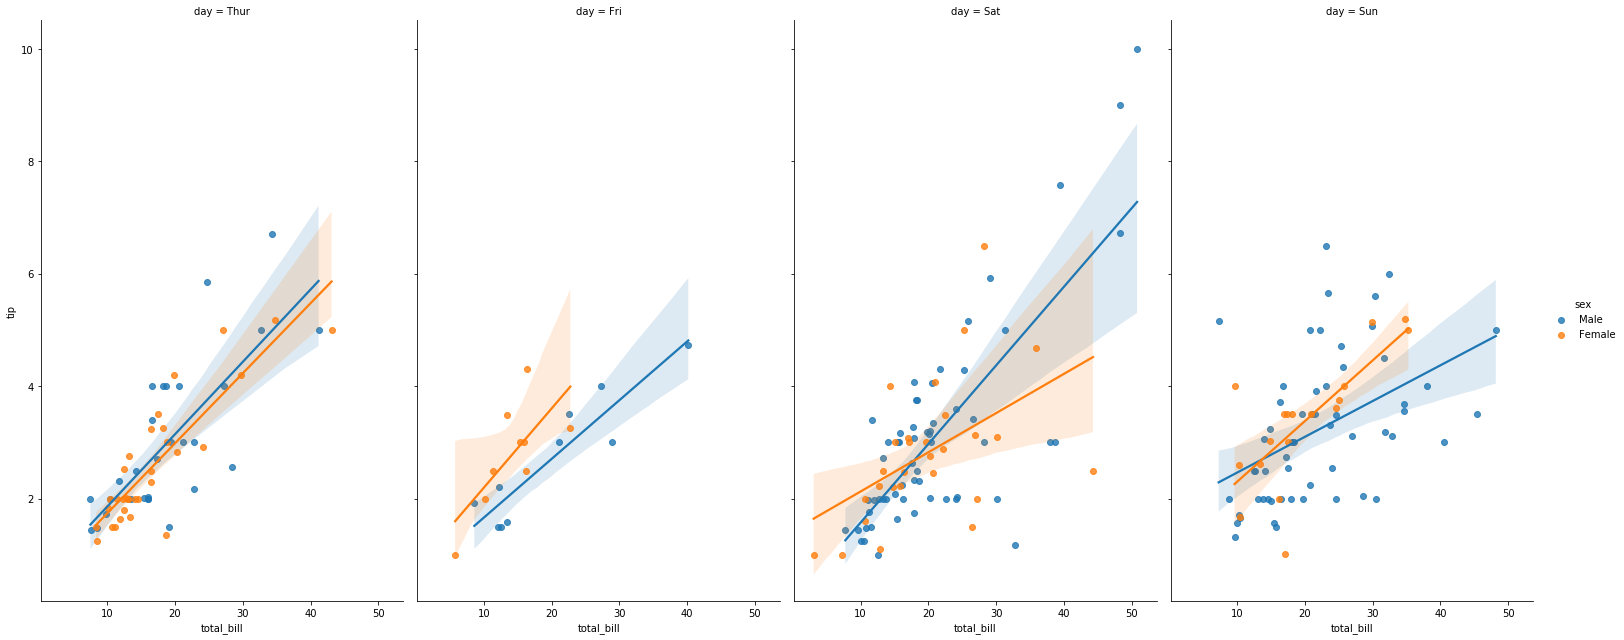

In [186]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',aspect=0.6,height=9)

In [187]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


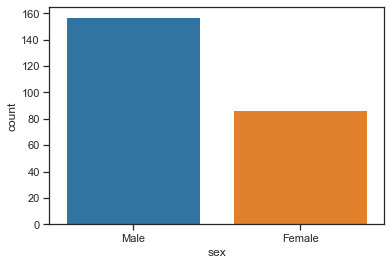

In [210]:
sns.set_context('notebook')
sns.countplot('sex',data=tips)